<center><img src="prog_lang.jpg" width=500></center>

How can you determine which programming languages and technologies are most widely used? Which languages are gaining or losing popularity, helping you decide where to focus your efforts?

One excellent data source is Stack Overflow, a programming question-and-answer site with more than 16 million questions on programming topics. Each Stack Overflow question is tagged with a label identifying its topic or technology. By counting the number of questions related to each technology, you can estimate the popularity of different programming languages.

In this project, you will use data from the Stack Exchange Data Explorer to examine how the relative popularity of R, Python, Java, and JavaScript has changed over time.

You'll work with a dataset containing one observation per tag per year, including the number of questions for that tag and the total number of questions that year.

`stack_overflow_data.csv`
|Column|Description|
|------|-----------|
|`year`|The year the question was asked (2008-2020)|
|`tag`|A word or phrase that describes the topic of the question|
|`num_questions`|The number of questions with a certain tag in that year|
|`year_total`|The total number of questions asked in that year|

In [8]:
# Load necessary packages
library(readr)
library(dplyr)
library(ggplot2)

In [9]:
# Load the dataset
data <- read_csv("stack_overflow_data.csv")

Rows: 420066 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tag
dbl (3): year, num_questions, year_total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


   year tag num_questions year_total   fraction
1  2008   r             8     168541 0.00474662
2  2009   r           523     981124 0.05330621
3  2010   r          2264    1970729 0.11488135
4  2011   r          5835    3473395 0.16799126
5  2012   r         12183    4787010 0.25450124
6  2013   r         22256    6037170 0.36864955
7  2014   r         30923    6431458 0.48080855
8  2015   r         40704    6612772 0.61553612
9  2016   r         44365    6593600 0.67284943
10 2017   r         51061    6342517 0.80505894
11 2018   r         52288    5621997 0.93006097
12 2019   r         52249    5410632 0.96567277
13 2020   r         52662    5452545 0.96582422


year,tag,num_questions,year_total,percentage
<int>,<chr>,<dbl>,<dbl>,<dbl>
2020,r,52662,5452545,0.9658242


[1] 0.9658242

tag,total
<chr>,<dbl>
javascript,1373634
python,1187838
java,982747
android,737330
c#,730045


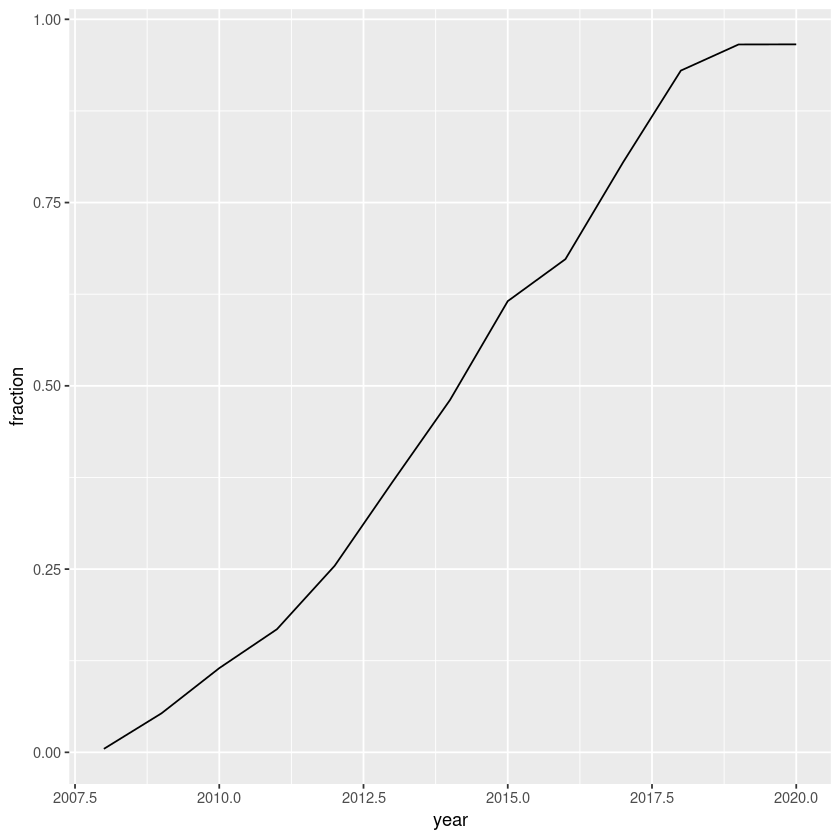

[1] "javascript" "python"     "java"       "android"    "c#"

year,tag,num_questions,year_total,total,fraction,ratio
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019,swiftui,3546,5410632,227084225040,1.561535e-08,3558.016


[1] "swiftui"

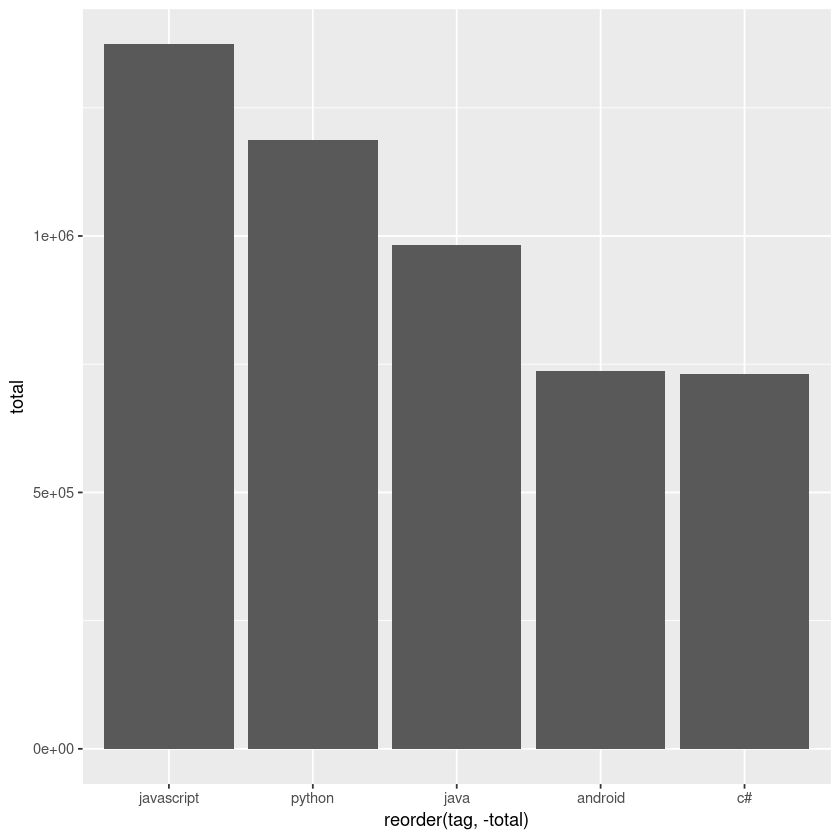

In [10]:
# Start coding here
# Use as many cells as you like!
df <- transform(data,
			   year = as.integer(year),
			   num_questions = as.numeric(num_questions),
			   year_total = as.numeric(year_total))

# Find out whethere R has been growing or shrinking over time and visualization:
r_overtime <- df %>%
	mutate(fraction = num_questions/ year_total * 100) %>%
	filter(tag == "r") %>%
	arrange(year)
r_over_time <- data.frame(r_overtime)
print(r_over_time)

ggplot(r_overtime, aes(x = year, y = fraction))+
	geom_line()

# Fraction of total number of questions asked in 2020 that had the R tag:
r_percentage_2020 <- df %>%
	mutate(percentage = num_questions/ year_total * 100) %>%
	filter(year == "2020", tag == "r")
r_percentage_2020

r_percentage <- as.numeric(r_percentage_2020$percentage)
r_percentage

# Five most asked about tags between 2015 and 2020 and visualization:
most_asked_about <- df %>%
	filter(year >= "2015") %>%
	group_by(tag) %>%
	summarise(total = sum(num_questions)) %>%
	arrange(desc(total)) %>%
	head(n=5)
most_asked_about

ggplot(most_asked_about, aes(x = reorder(tag, -total), y = total)) +
	geom_col()

highest_tags <- c(most_asked_about$tag)
highest_tags

# Tag with largest year-over-year increase in its fraction:
highest_ratio <- df %>%
	group_by(year) %>%
	mutate (total = sum(year_total)) %>%
	ungroup() %>%
	mutate(fraction = num_questions/ total) %>%
	arrange(year, tag) %>%
	group_by(tag) %>%
	mutate(ratio = fraction/ lag(fraction)) %>%
	ungroup() %>%
	slice_max(ratio, n=1)
highest_ratio

highest_ratio_tag <- c(highest_ratio$tag)
highest_ratio_tag

